# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

In [291]:
'17 campaigns were used in the study'

'17 campaigns were used in the study'

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [292]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from time import time
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc, roc_auc_score
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore", message="Unlike other reduction functions")
pd.set_option('display.max_columns', None)

In [293]:
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [294]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [295]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

The Business Objective of analyzing the dataset is to develop a predictive model to accurately identify potential clients who are more likely to subscribe to a term deposit offered by the bank. This model aims to enable the bank to target its marketing efforts more effectively, thereby increasing the efficiency of its campaigns and improving the subscription rates for its term deposit products. 

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features (columns 1 - 7), prepare the features and target column for modeling with appropriate encoding and transformations.

In [296]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [297]:
# X = df.drop('y', axis=1)
X = df.drop(['y', 'duration'], axis=1)
y = df['y']

In [298]:
X_string_cols = X.select_dtypes(include=['object']).columns
X_string_cols = X_string_cols.to_list()
X_string_cols

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome']

In [299]:
transformer = make_column_transformer(
                                        (OneHotEncoder(drop = 'if_binary',
                                                       sparse=False, 
                                                       ), X_string_cols),
                                         remainder = StandardScaler()
                                        )

X_transform = transformer.fit_transform(X)

features = transformer.get_feature_names_out()

X_final = pd.DataFrame(X_transform, columns=features)

X_final

,onehotencoder__job_admin.,onehotencoder__job_blue-collar,onehotencoder__job_entrepreneur,onehotencoder__job_housemaid,onehotencoder__job_management,onehotencoder__job_retired,onehotencoder__job_self-employed,onehotencoder__job_services,onehotencoder__job_student,onehotencoder__job_technician,onehotencoder__job_unemployed,onehotencoder__job_unknown,onehotencoder__marital_divorced,onehotencoder__marital_married,onehotencoder__marital_single,onehotencoder__marital_unknown,onehotencoder__education_basic.4y,onehotencoder__education_basic.6y,onehotencoder__education_basic.9y,onehotencoder__education_high.school,onehotencoder__education_illiterate,onehotencoder__education_professional.course,onehotencoder__education_university.degree,onehotencoder__education_unknown,onehotencoder__default_no,onehotencoder__default_unknown,onehotencoder__default_yes,onehotencoder__housing_no,onehotencoder__housing_unknown,onehotencoder__housing_yes,onehotencoder__loan_no,onehotencoder__loan_unknown,onehotencoder__loan_yes,onehotencoder__contact_telephone,onehotencoder__month_apr,onehotencoder__month_aug,onehotencoder__month_dec,onehotencoder__month_jul,onehotencoder__month_jun,onehotencoder__month_mar,onehotencoder__month_may,onehotencoder__month_nov,onehotencoder__month_oct,onehotencoder__month_sep,onehotencoder__day_of_week_fri,onehotencoder__day_of_week_mon,onehotencoder__day_of_week_thu,onehotencoder__day_of_week_tue,onehotencoder__day_of_week_wed,onehotencoder__poutcome_failure,onehotencoder__poutcome_nonexistent,onehotencoder__poutcome_success,remainder__age,remainder__campaign,remainder__pdays,remainder__previous,remainder__emp.var.rate,remainder__cons.price.idx,remainder__cons.conf.idx,remainder__euribor3m,remainder__nr.employed
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.533034,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.712460,0.331680
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.628993,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.712460,0.331680
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.290186,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.712460,0.331680
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.002309,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.712460,0.331680
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.533034,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.712460,0.331680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.164336,-0.565922,0.195414,-0.349494,-0.752343,2.058168,-2.224953,-1.495186,-2.815697
41184,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.573445,-0.565922,0.195414

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [300]:
# stratifying the data to make sure it is proportionately split.
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.25, random_state=42, stratify=y)

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

label_encoder = LabelEncoder()
y_train_smote = label_encoder.fit_transform(y_train_smote)
y_test = label_encoder.fit_transform(y_test)


In [301]:
y_train.value_counts(normalize=True)

no     0.887346
yes    0.112654
Name: y, dtype: float64

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [302]:
dummy_clf = DummyClassifier(strategy='most_frequent')
dummy_clf.fit(X_train_smote, y_train_smote)

y_pred = dummy_clf.predict(X_test)
print(f"Baseline Accuracy: {accuracy_score(y_test, y_pred)}")

pd.DataFrame(classification_report(y_test, y_pred, output_dict=True, zero_division=0)).transpose()


Baseline Accuracy: 0.8873458288821987


,precision,recall,f1-score,support
0,0.887346,1.000000,0.940311,9137.000000
1,0.000000,0.000000,0.000000,1160.000000
accuracy,0.887346,0.887346,0.887346,0.887346
macro avg,0.443673,0.500000,0.470155,10297.000000
weighted avg,0.787383,0.887346,0.834381,10297.000000


### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [303]:
model = LogisticRegression()
model.fit(X_train_smote, y_train_smote)

model_y_pred = model.predict(X_test)


pd.DataFrame(classification_report(y_test, model_y_pred, output_dict=True, zero_division=0)).transpose()

,precision,recall,f1-score,support
0,0.950183,0.853781,0.899406,9137.000000
1,0.359847,0.647414,0.462581,1160.000000
accuracy,0.830533,0.830533,0.830533,0.830533
macro avg,0.655015,0.750598,0.680994,10297.000000
weighted avg,0.883679,0.830533,0.850196,10297.000000


### Problem 9: Score the Model

What is the accuracy of your model?

In [304]:
print(f"Accuracy Score for Logistic Regression: {accuracy_score(y_test, model_y_pred)}")

Accuracy Score for Logistic Regression: 0.8305331649995145


### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [305]:
model_params = {
    
    
    'Dummy Classifier': {
        'model': DummyClassifier(),
        'params': {
            
        }
    },
    
    'KNN': {
        'model': KNeighborsClassifier(),
        'params': {

        }
    },
    
    'Decision Tree': {
        'model': DecisionTreeClassifier(),
        'params': {

        }
    },
    
    'Logistic Regression': {
        'model': LogisticRegression(solver='liblinear'),
        'params': {

        }
    },
    'Linear SVC': {
        'model': LinearSVC(),
        'params': {

        }
    }
}

Classification Report for Dummy Classifier

              precision    recall  f1-score       support
0              0.887346  1.000000  0.940311   9137.000000
1              0.000000  0.000000  0.000000   1160.000000
accuracy       0.887346  0.887346  0.887346      0.887346
macro avg      0.443673  0.500000  0.470155  10297.000000
weighted avg   0.787383  0.887346  0.834381  10297.000000

Classification Report for KNN

              precision    recall  f1-score       support
0              0.940885  0.749042  0.834075   9137.000000
1              0.241482  0.629310  0.349032   1160.000000
accuracy       0.735554  0.735554  0.735554      0.735554
macro avg      0.591184  0.689176  0.591553  10297.000000
weighted avg   0.862095  0.735554  0.779433  10297.000000

Classification Report for Decision Tree

              precision    recall  f1-score       support
0              0.918438  0.903360  0.910836   9137.000000
1              0.325954  0.368103  0.345749   1160.000000
accuracy    

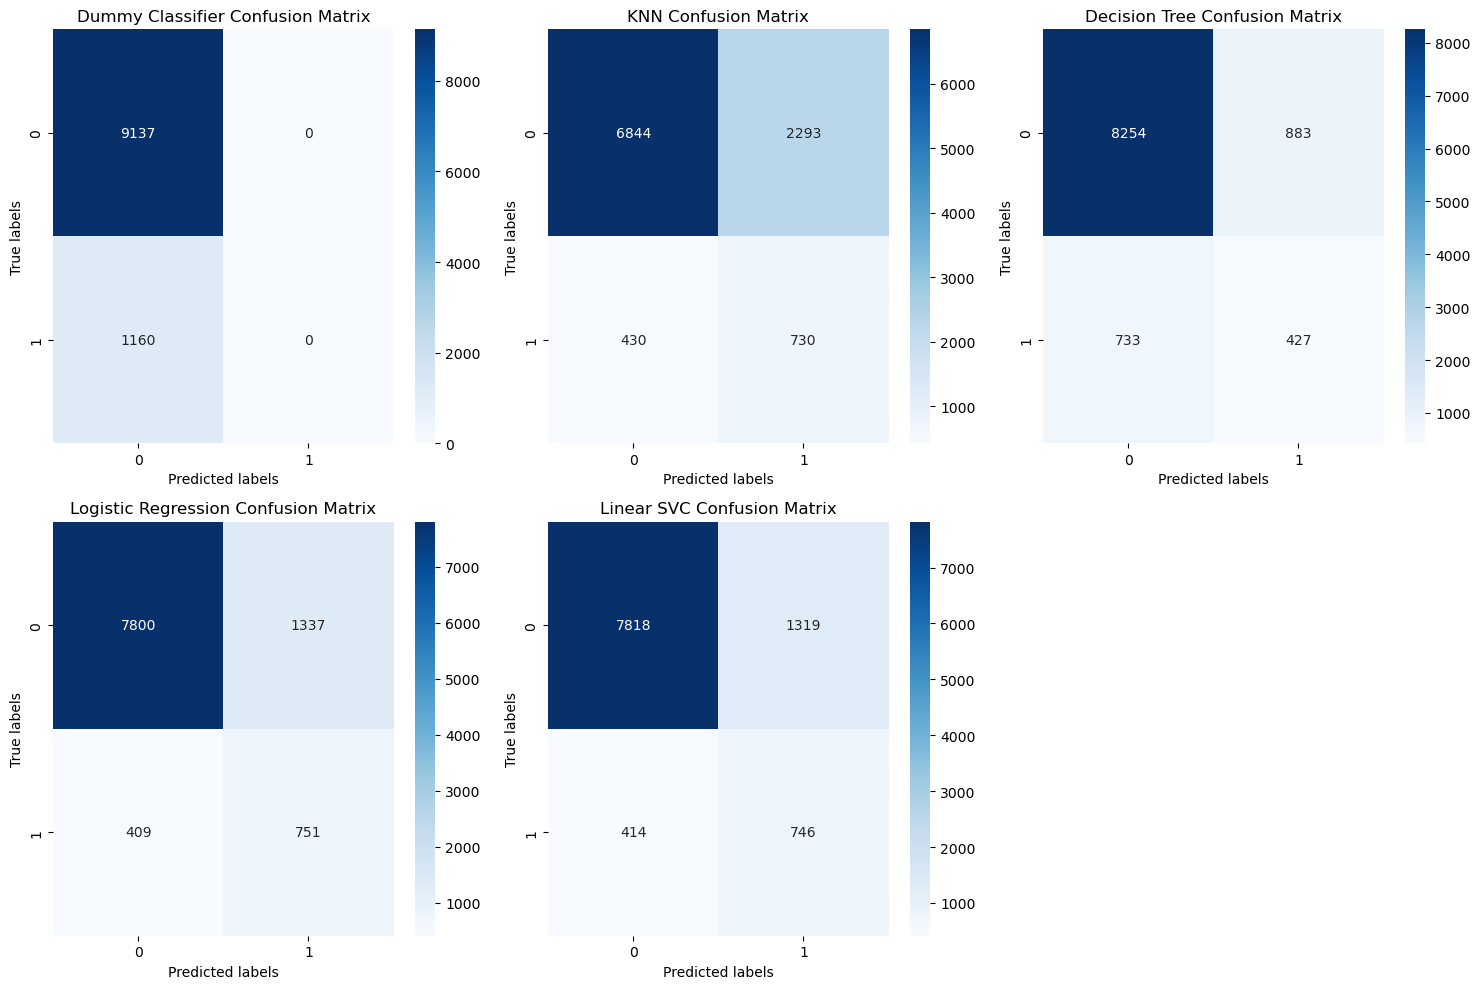

In [306]:
results = []
plt.figure(figsize=(15, 10))

# Loop through models
for idx, (model_name, mp) in enumerate(model_params.items(), 1):
    start_time = time()
    grid = GridSearchCV(mp['model'], mp['params'], cv=2, return_train_score=False)
    grid.fit(X_train_smote, y_train_smote)
    end_time = time()
    
    # Predictions for ROC-AUC
    if hasattr(grid.best_estimator_, "predict_proba"):
        y_scores = grid.predict_proba(X_test)[:, 1]  # Probability of positive class
    else:
        y_scores = grid.decision_function(X_test)
    
    # ROC-AUC calculation
    fpr, tpr, _ = roc_curve(y_test, y_scores)
    roc_auc = auc(fpr, tpr)
    
    # Confusion Matrix
    y_pred = grid.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    
    # Plotting Confusion Matrix
    plt.subplot(2, 3, idx)
    plt.title(f'{model_name} Confusion Matrix')
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    
    # Print Classification Report
    print(f'Classification Report for {model_name}')
    print('')
    print(pd.DataFrame(classification_report(y_test, grid.best_estimator_.predict(X_test), output_dict=True, zero_division=0)).transpose())
    print('')
    
    results.append({
        'model': model_name,
        'best_params': grid.best_params_,
        'train_score': grid.best_score_,
        'test_score': grid.score(X_test, y_test),
        'average_fit_time': (end_time - start_time) / grid.n_splits_,
        'roc_auc_score': roc_auc
    })

plt.tight_layout()
plt.show()


In [307]:
# Display the results including ROC AUC scores
results_df = pd.DataFrame(results, columns=['model', 'train_score', 'test_score', 'average_fit_time', 'roc_auc_score',
                                           'best_params'])

In [308]:
results_df

,model,train_score,test_score,average_fit_time,roc_auc_score,best_params
0,Dummy Classifier,0.499982,0.887346,0.018000,0.500000,{}
1,KNN,0.825180,0.735554,13.625304,0.729326,{}
2,Decision Tree,0.889935,0.843061,0.520587,0.637449,{}
3,Logistic Regression,0.740250,0.830436,0.420220,0.802545,{}
4,Linear SVC,0.739630,0.831699,5.572446,0.803232,{}


### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

In [309]:
model_params = {
    
    
    'Dummy Classifier': {
        'model': DummyClassifier(),
        'params': {
            'strategy': ['most_frequent']
        }
    },
    
    'KNN': {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [3, 5, 7],
            'weights': ['uniform']
        }
    },
    
    'Decision Tree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'criterion': ['gini', 'entropy'],
            'max_depth': [9, 12, 15, 17],
            'min_samples_split': [50, 100, 250],
            'min_samples_leaf': [50, 100, 250]
        }
    },
    
    'Logistic Regression': {
        'model': LogisticRegression(solver='liblinear'),
        'params': {
            'C': [0.1, 1, 10, 100],
            'penalty': ['l2', 'l1']
        }
    },
    'Linear SVC': {
        'model': LinearSVC(),
        'params': {
            'C': [0.01, 0.1, 1, 10],
            'max_iter':[1000, 10000]
        }
    }
}

Classification Report for Dummy Classifier

              precision    recall  f1-score       support
0              0.887346  1.000000  0.940311   9137.000000
1              0.000000  0.000000  0.000000   1160.000000
accuracy       0.887346  0.887346  0.887346      0.887346
macro avg      0.443673  0.500000  0.470155  10297.000000
weighted avg   0.787383  0.887346  0.834381  10297.000000

Classification Report for KNN

              precision    recall  f1-score       support
0              0.935692  0.793039  0.858480   9137.000000
1              0.259303  0.570690  0.356585   1160.000000
accuracy       0.767991  0.767991  0.767991      0.767991
macro avg      0.597497  0.681864  0.607532  10297.000000
weighted avg   0.859494  0.767991  0.801939  10297.000000

Classification Report for Decision Tree

              precision    recall  f1-score       support
0              0.930671  0.918245  0.924416   9137.000000
1              0.417317  0.461207  0.438165   1160.000000
accuracy    

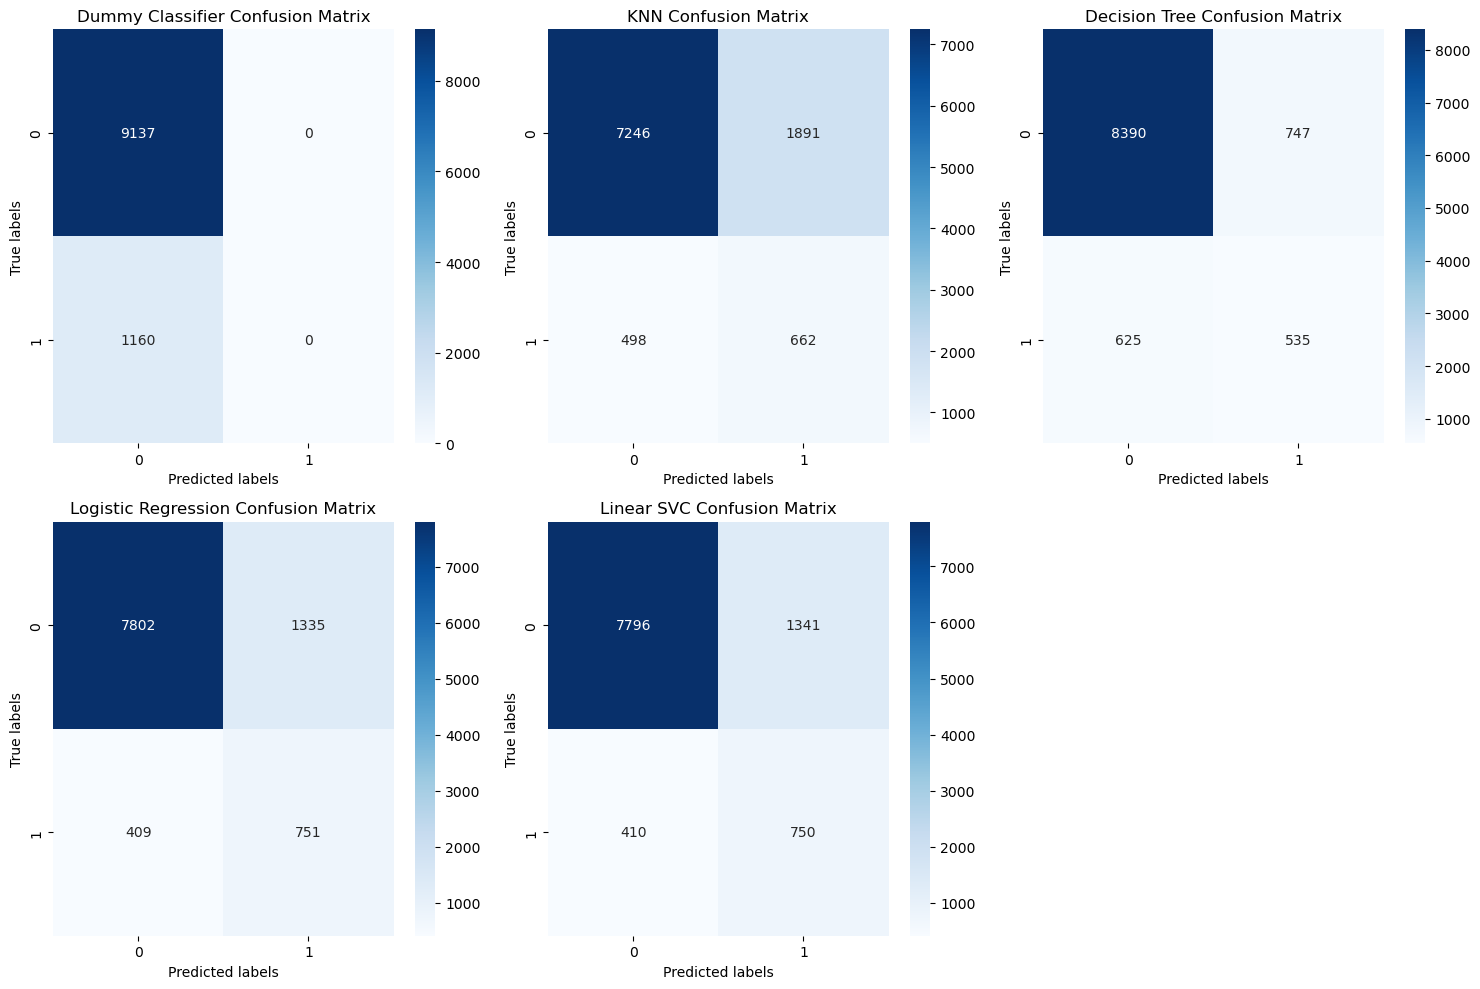

In [310]:
results = []
plt.figure(figsize=(15, 10))

# Loop through models
for idx, (model_name, mp) in enumerate(model_params.items(), 1):
    start_time = time()
    grid = GridSearchCV(mp['model'], mp['params'], cv=2, return_train_score=False)
    grid.fit(X_train_smote, y_train_smote)
    end_time = time()
    
    # Predictions for ROC-AUC
    if hasattr(grid.best_estimator_, "predict_proba"):
        y_scores = grid.predict_proba(X_test)[:, 1]  # Probability of positive class
    else:
        y_scores = grid.decision_function(X_test)
    
    # ROC-AUC calculation
    fpr, tpr, _ = roc_curve(y_test, y_scores)
    roc_auc = auc(fpr, tpr)
    
    # Confusion Matrix
    y_pred = grid.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    
    # Plotting Confusion Matrix
    plt.subplot(2, 3, idx)
    plt.title(f'{model_name} Confusion Matrix')
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    
    # Print Classification Report
    print(f'Classification Report for {model_name}')
    print('')
    print(pd.DataFrame(classification_report(y_test, grid.best_estimator_.predict(X_test), output_dict=True, zero_division=0)).transpose())
    print('')
    
    results.append({
        'model': model_name,
        'best_params': grid.best_params_,
        'train_score': grid.best_score_,
        'test_score': grid.score(X_test, y_test),
        'average_fit_time': (end_time - start_time) / grid.n_splits_,
        'roc_auc_score': roc_auc
    })

plt.tight_layout()
plt.show()


In [311]:
# Display the results including ROC AUC scores
results_df = pd.DataFrame(results, columns=['model', 'train_score', 'test_score', 'average_fit_time', 'roc_auc_score',
                                           'best_params'])

In [312]:
results_df

,model,train_score,test_score,average_fit_time,roc_auc_score,best_params
0,Dummy Classifier,0.499982,0.887346,0.017713,0.500000,{'strategy': 'most_frequent'}
1,KNN,0.845445,0.767991,37.206715,0.710598,"{'n_neighbors': 3, 'weights': 'uniform'}"
2,Decision Tree,0.853453,0.866757,13.575976,0.766122,"{'criterion': 'entropy', 'max_depth': 17, 'min..."
3,Logistic Regression,0.740414,0.830630,6.721035,0.802579,"{'C': 1, 'penalty': 'l1'}"
4,Linear SVC,0.740123,0.829950,45.107374,0.803485,"{'C': 0.01, 'max_iter': 1000}"


##### Questions